# The "double descent" phenomenon

Let's suppose that we have samples $(\boldsymbol{x}_1,y_1),\dots, (\boldsymbol{x}_n, y_n)$ generated via

$$
y_i = \boldsymbol{x}_i^\top \boldsymbol{b}_\star + \varepsilon_i
$$

where $\varepsilon_i$ is noise, usually assumed to have mean zero and variance $\sigma^2$, and $\boldsymbol{b}_\star$ is the unobserved "ground truth" which we would like to be able to estimate.

One interesting question from the statistical perspective is: how many samples $n$ we need to approximately recover $\boldsymbol{b}_\star$? For formally, suppose we fix $p$ as some reasonably large dimension. Given $n$ training samples, we fit a $\hat{\boldsymbol{b}}$ (either using $\hat{\boldsymbol{b}} = \boldsymbol{X}^\top (\boldsymbol{XX}^\top)^{-1}\boldsymbol{y}$ or $\hat{\boldsymbol{b}} = (\boldsymbol{X^\top X})^{-1}\boldsymbol{X}^\top \boldsymbol{y}$), and measure the error $e_n = \|\hat{\boldsymbol{b}} - \boldsymbol{b}_\star\|_2^2$. Intuitively, we might think that as $n$ get's bigger, $e_n$ will get smaller, since we're "learning more about $\boldsymbol{b}_\star$". Intruigingly, this is not always the case.

Below we run a simple simulation to find $e_n$ as a function of $n$. It turns out that the shape of this plot depends largely on the "signal-to-noise" ratio, which is $\|\boldsymbol{\beta}_\star\|_2 / \sigma$ where $\sigma^2 = \text{Var}(\varepsilon)$. Intuitively, if the signal-to-noise ratio is large, the "signal" term $\boldsymbol{Xb}_\star$ is larger than the noise part $\varepsilon$.

In this simulation, for various values of $n$, we draw a data matrix $\boldsymbol{X} \sim N(0,\boldsymbol{I}) \in \mathbb{R}^{n\times p}$ and compute $\boldsymbol{y} = \boldsymbol{Xb}_{\star} + \varepsilon$ where $\|\boldsymbol{b}_\star\|_2 = \text{SNR}$ and $\text{Var}(\varepsilon) = 1$. We then fit $\hat{\boldsymbol{b}} = \boldsymbol{X}^\dagger \boldsymbol{y}$ (where either $\boldsymbol{X}^\dagger = \boldsymbol{X}^\top (\boldsymbol{XX}^\top)^{-1}$ or $(\boldsymbol{X^\top X})^{-1}\boldsymbol{X}^\top$) and measure $e_n = \|\hat{\boldsymbol{b}} - \boldsymbol{b}_\star\|_2$. We repeat this for $T$ trials, and take the average error over these trials.

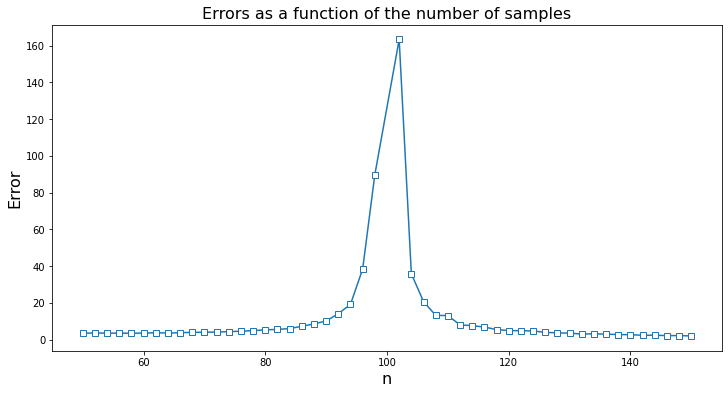

In [1]:
import matplotlib.pyplot as plt
import numpy as np



def simulation(p, n_min, n_max, snr=np.sqrt(5)):
    N_TRIALS = 50

    b_star = np.random.normal(size=p)
    b_star /= np.linalg.norm(b_star)/snr
    errors = []
    std = []
    nn = [i for i in np.arange(n_min, n_max+1, 2) if i != p]
    for n in nn:
        temp = []
        for t in range(N_TRIALS):

            #generate data
            X = np.random.normal(size=(n,p))
            epsilon = np.random.normal(size=n)
            y = np.dot(X, b_star) + epsilon

            b_hat = np.dot(np.linalg.pinv(X),y) # find least squares solution

            error = np.linalg.norm(b_hat-b_star)**2 # record error
            temp.append(error)
        errors.append(np.mean(temp))
        std.append(np.std(temp))

    return np.array(errors), np.array(std)



p = 100
n_min = 50
n_max = 150


errors, std = simulation(p=p, n_min=n_min, n_max=n_max)

nn = [i for i in np.arange(n_min, n_max+1, 2) if i != p]

fig = plt.figure(figsize=(12,6))
plt.plot(nn, errors, marker='s', markerfacecolor='white')
plt.xlabel('n', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Errors as a function of the number of samples', fontsize=16)
plt.show()

Somewhat amazingly, the plot of $e_n$ verses in $n$ is not monotone at all -- in fact, it reaches a maximum at $n=p$! So more data points do not always help us; this is particularly true when $p$ is very large. This phenomenon has recently been referred to as "double descent", and it is hypothesized that a similar phenomenon is behind the remarkable recent successes of neural networks.